In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# DAY 1 - Feedforward Neural Network 
> Key Learnings:
* Feedforward Neural Networks are a fundamental type of neural network that can model complex relationships between input and output.
* ReLU activation helps introduce non-linearity, while Softmax is perfect for multi-class classification tasks.
* Categorical cross-entropy is commonly used for multi-class classification problems, while Adam optimization adapts learning rates to improve convergence.
* Data preprocessing is critical for achieving optimal model performance — particularly scaling inputs and encoding labels.



A Feedforward Neural Network is the most basic type of neural network where the data flows in one direction: 

> `Input → Hidden Layers → Output`

For digit recognition, we’ll use the MNIST dataset:

* 28x28 grayscale images of handwritten digits (0–9).
* 60,000 training samples + 10,000 test samples.
* Each image is flattened to a vector of 784 values (28 × 28).


## 🔢 Step 1: Import Libraries
Import all necessary libraries from TensorFlow and Keras.


In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
import numpy as np
import matplotlib.pyplot as plt


## 🧺 Step 2: Load and Preprocess the MNIST Data
### In this step, we'll:
* Load the MNIST dataset (images & labels).
* Normalize image pixel values to range [0, 1].
* Convert labels to one-hot encoded format.

### 📌 Notes:
* reshape(-1, 28*28): transforms each 28x28 image into a flat vector
* .to_categorical(): converts class numbers (0–9) into vectors (e.g., 3 → [0 0 0 1 0 0 0 0 0 0]).



In [5]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Flatten 28x28 images to 784-dimensional vectors
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

# Convert labels to one-hot encoded format
train_labels = utils.to_categorical(train_labels, 10)
test_labels = utils.to_categorical(test_labels, 10)

# Display shape info
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)
print("Example label (one-hot):", train_labels[0])


Training data shape: (60000, 784)
Test data shape: (10000, 784)
Example label (one-hot): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 🏗️ Step 3: Build the Feedforward Neural Network

We’ll use Keras’s Sequential model to stack layers:

* Input Layer: implicitly defined by input_shape=(784,)
* Hidden Layer: 128 neurons, ReLU activation
* Output Layer: 10 neurons, Softmax activation

📌 What’s Happening Here:
* Dense(128, activation='relu'): fully connected hidden layer
* Dense(10, activation='softmax'): outputs a probability distribution over 10 classes
* model.summary(): prints a neat summary showing parameter count and layer structure

In [10]:
from tensorflow.keras import Input

# Build the model with an explicit Input layer
model = models.Sequential([
    Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Show model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 🧪 Step 4: Compile the Model
In this step, we configure the model for training by specifying:

> Optimizer: how the model updates weights (we'll use 'adam')

> Loss Function: how it measures prediction error ('categorical_crossentropy' for multi-class classification)

> Metrics: what we want to monitor (e.g., 'accuracy')

📌 Why These Choices?
* `adam`: adaptive learning rate optimization, very effective for deep learning

* `categorical_crossentropy`: standard for multi-class, one-hot encoded targets

* `accuracy`: gives a quick look at performance during training

In [11]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


## 🏋️ Step 5: Train the Model (with Visual Feedback)
Let's start with training + a live training accuracy/loss plot.

In [13]:
# Define training history callback to capture metrics
history = model.fit(
    train_images, train_labels,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9962 - loss: 0.0125 - val_accuracy: 0.9783 - val_loss: 0.0831
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9969 - loss: 0.0106 - val_accuracy: 0.9790 - val_loss: 0.0861
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9974 - loss: 0.0089 - val_accuracy: 0.9798 - val_loss: 0.0846
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9971 - loss: 0.0088 - val_accuracy: 0.9803 - val_loss: 0.0823
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9981 - loss: 0.0067 - val_accuracy: 0.9815 - val_loss: 0.0848
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 0.9793 - val_loss: 0.0992
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9838 - val_loss: 0.0803
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9990 - loss: 0.0041 - 

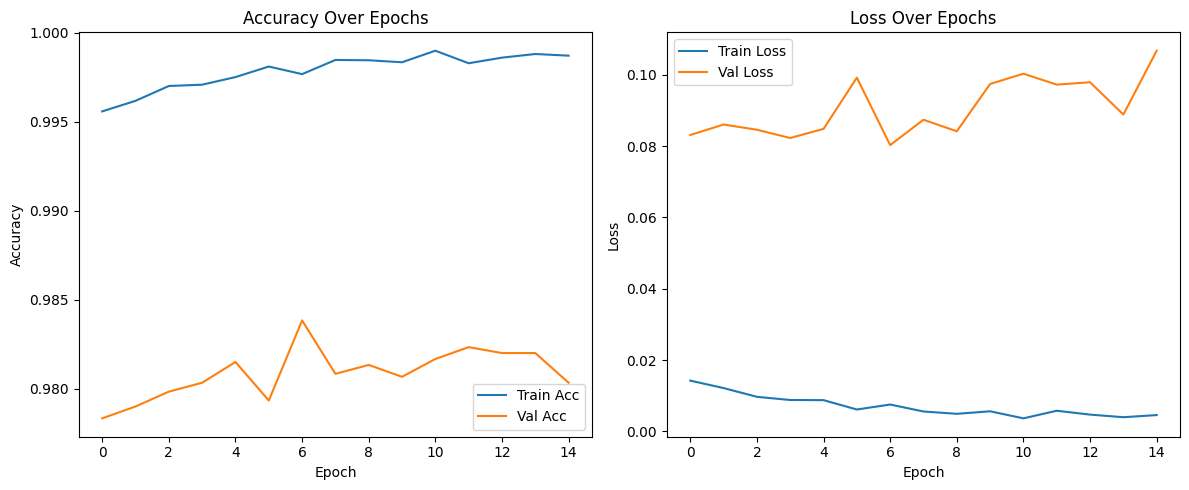

In [14]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


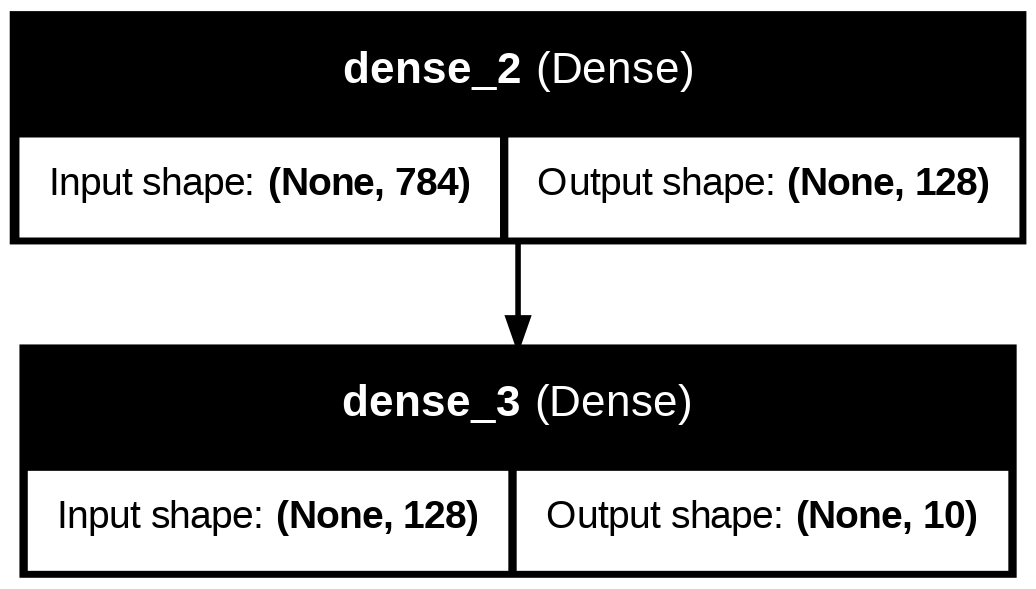

In [15]:
from tensorflow.keras.utils import plot_model

# Save and display the model structure
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


## 🔮 Bonus: Predict and Visualize a Few Digits with Classification

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


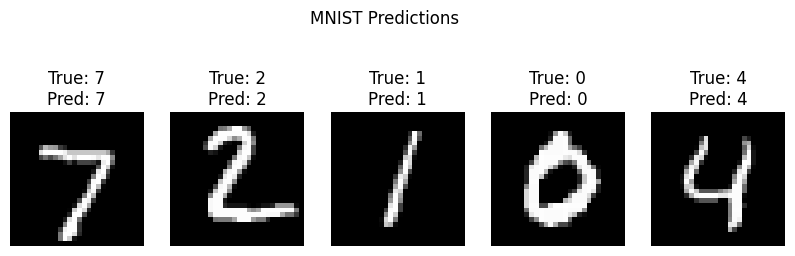

In [18]:
# Predict first 5 test samples
predictions = model.predict(test_images[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels[:5], axis=1)

# Plot
plt.figure(figsize=(10, 3.5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.suptitle("MNIST Predictions")
plt.show()


## 🔍 Step 6: Evaluate the Model + Predict & Visualize Internals
✅ What we'll do now:
* Evaluate model performance on unseen test data.
* Visualize predictions alongside actual digits.
* (Optional) Visualize internal layer activations for a selected digit — to see what the network is “looking at.”

In [19]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.4f}")


313/313 - 0s - 1ms/step - accuracy: 0.9759 - loss: 0.1220

Test accuracy: 0.9759


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


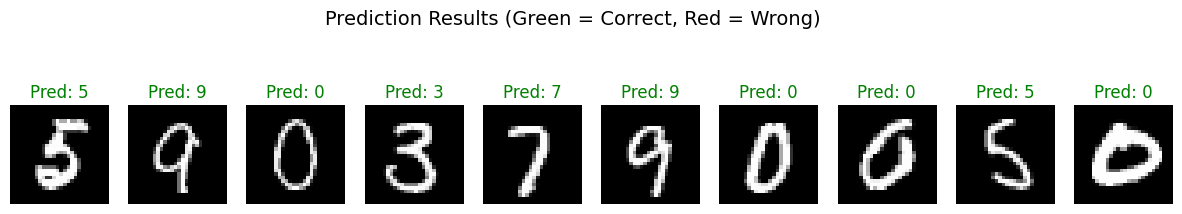

In [20]:
# Pick some random test digits
num_samples = 10
indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[indices]
sample_labels = np.argmax(test_labels[indices], axis=1)
predicted_labels = np.argmax(model.predict(sample_images), axis=1)

# Plot images with predictions
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    color = 'green' if predicted_labels[i] == sample_labels[i] else 'red'
    plt.title(f"Pred: {predicted_labels[i]}", color=color)
    plt.axis('off')
plt.suptitle("Prediction Results (Green = Correct, Red = Wrong)", fontsize=14)
plt.show()


## 📦 Step 7: Save and Load the Model
✅ Why Save the Model?
* Persistence: Keep the trained model to use it later without retraining.
* Sharing: Share the model with others or use it in production.
* Portability: Transfer it between different environments (e.g., from your local machine to a server).

In [27]:
# Save the model to a file
model.save('mnist_feedforward_model.h5')  # Save in HDF5 format


In [28]:
# Load the model back from file
loaded_model = tf.keras.models.load_model('mnist_feedforward_model.h5')


In [29]:
# Evaluate the loaded model on the test data
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(test_images, test_labels, verbose=2)
print(f"\nLoaded model accuracy: {loaded_test_accuracy:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9779 - loss: 0.0864

Loaded model accuracy: 0.9779


🧳 Notes:
HDF5 Format (.h5): This saves both the architecture and weights.

TensorFlow SavedModel Format: Saves a directory with the model’s structure and weights — great for deployment.

# Appendix

### 1. Linear Transformation (Neuron Output):
The output of a neuron is calculated as: 
$$
z = W \cdot x + b
$$
where:
- $ \ z \ $ is the output (pre-activation),
- $ \ W \ $ is the weight matrix,
- $ \ x \ $ is the input vector,
- $ \ b \ $ is the bias term.

### 2. Activation Functions:
- The **ReLU** activation is given by: 
$$
\text{ReLU}(z) = \max(0, z)
$$
- The **Softmax** activation for the output layer is given by:
$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}
$$
where $ \ C \ $ is the number of classes, and $ \ z_i \ $ is the input to the $ \ i \ $-th output neuron.

### 3. Loss Function (Categorical Cross-Entropy):
The loss function for multi-class classification is:
$$
\mathcal{L} = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$
where:
- $ \ y_i \ $ is the true label (one-hot encoded),
- $ \ \hat{y}_i \ $ is the predicted probability for class $ \ i \ $.

### 4. Adam Optimizer Update Rule:
The update rule for Adam optimizer is:
$$
W_t = W_{t-1} - \eta \cdot \frac{m_t}{\sqrt{v_t} + \epsilon}
$$
where:
- $ \eta \ $ is the learning rate,
- $ \ m_t \ $ is the moving average of the gradients,
- $ \ v_t \ $ is the moving average of the squared gradients,
- $ \epsilon\ $ is a small constant to prevent division by zero.
